In [1]:
import sys
import importlib
import fiftyone.utils.coco as fouc
sys.path.append("../")
sys.path.append("../../")
sys.path.append("../../../")
import core.loading_data as ld
import core.datasets as dt
import core.stent as st
importlib.reload(ld)
importlib.reload(dt)
importlib.reload(st)
nii_path = "C:\\Users\\MikhailDarakhovich\\stent_detection\\data\\data_stent\\nifti"
nii_mask_path = "C:\\Users\\MikhailDarakhovich\\stent_detection\\data\\data_stent\\seg"


# yolo11

## yolo11_final_dataset_2cl_best

### p201,206 conf 0.275

#### results

In [34]:
import fiftyone as fo

dataset = fo.load_dataset('yolo11_final_dataset_2cl_best_p201_p206_conf0275')
# Get the 10 most common classes in the dataset
counts = dataset.count_values("full_GT_2cl.detections.label")
classes = sorted(counts, key=counts.get, reverse=True)[:3]

# Evaluate the objects in the `predictions` field with respect to the
# objects in the `ground_truth` field
results = dataset.evaluate_detections(
    pred_field="preds_yolo11x_conf0275_iou015_best",
    gt_field="full_GT_2cl",
    eval_key="full_GT_vs_yolo11",
    method="coco",
    compute_mAP=True,
    iou=0.15,
    classwise=False
)

# Print a classification report for the top-10 classes
results.print_report(classes=classes)

# Print some statistics about the total TP/FP/FN counts
print("TP: %d" % dataset.sum("full_GT_vs_yolo11_tp"))
print("FP: %d" % dataset.sum("full_GT_vs_yolo11_fp"))
print("FN: %d" % dataset.sum("full_GT_vs_yolo11_fn"))

Evaluating detections...


10/24/2024 09:09:46 - INFO - fiftyone.utils.eval.detection -   Evaluating detections...


 100% |█████████████████| 644/644 [7.4s elapsed, 0s remaining, 97.8 samples/s]       


10/24/2024 09:09:53 - INFO - eta.core.utils -    100% |█████████████████| 644/644 [7.4s elapsed, 0s remaining, 97.8 samples/s]       


Performing IoU sweep...


10/24/2024 09:09:53 - INFO - fiftyone.utils.eval.coco -   Performing IoU sweep...


 100% |█████████████████| 644/644 [5.9s elapsed, 0s remaining, 108.0 samples/s]      


10/24/2024 09:09:59 - INFO - eta.core.utils -    100% |█████████████████| 644/644 [5.9s elapsed, 0s remaining, 108.0 samples/s]      


              precision    recall  f1-score   support

     covered       0.76      0.88      0.81      2324
   uncovered       0.87      0.38      0.53      1215

   micro avg       0.77      0.71      0.74      3539
   macro avg       0.81      0.63      0.67      3539
weighted avg       0.79      0.71      0.72      3539

TP: 2515
FP: 737
FN: 1024


C:\Users\MikhailDarakhovich\AppData\Local\Temp\ipykernel_19796\88602896.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



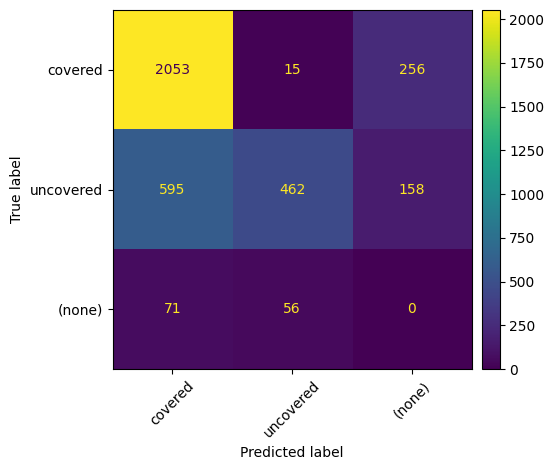

In [35]:
plot = results.plot_confusion_matrix(backend="matplotlib")
plot.show()

In [3]:
# Example usage
confusion_values = [
    [2053, 15, 256],  # covered
    [595, 462, 158],    # uncovered
    [71, 56, 0]      # (none)
]

results = calculate_combined_metrics(confusion_values)
print("Combined Confusion Matrix:\n", results["confusion_matrix"])
print(f"Precision: {results['precision']:.2f}")
print(f"Recall: {results['recall']:.2f}")
print(f"F1 Score: {results['f1_score']:.2f}")

Combined Confusion Matrix:
 [[   0  127]
 [ 414 3125]]
Precision: 0.96
Recall: 0.88
F1 Score: 0.92


### p201,206 conf 0.25

#### results

In [38]:
import fiftyone as fo

dataset = fo.load_dataset('yolo11_final_dataset_2cl_best_p201_p206_conf025')
# Get the 10 most common classes in the dataset
counts = dataset.count_values("full_GT_2cl.detections.label")
classes = sorted(counts, key=counts.get, reverse=True)[:3]

# Evaluate the objects in the `predictions` field with respect to the
# objects in the `ground_truth` field
results = dataset.evaluate_detections(
    pred_field="preds_yolo11x_conf025_iou015_best",
    gt_field="full_GT_2cl",
    eval_key="full_GT_vs_yolo11",
    method="coco",
    compute_mAP=True,
    iou=0.15,
    classwise=False
)

# Print a classification report for the top-10 classes
results.print_report(classes=classes)

# Print some statistics about the total TP/FP/FN counts
print("TP: %d" % dataset.sum("full_GT_vs_yolo11_tp"))
print("FP: %d" % dataset.sum("full_GT_vs_yolo11_fp"))
print("FN: %d" % dataset.sum("full_GT_vs_yolo11_fn"))

Evaluating detections...


10/24/2024 09:17:43 - INFO - fiftyone.utils.eval.detection -   Evaluating detections...


 100% |█████████████████| 644/644 [7.2s elapsed, 0s remaining, 95.9 samples/s]       


10/24/2024 09:17:51 - INFO - eta.core.utils -    100% |█████████████████| 644/644 [7.2s elapsed, 0s remaining, 95.9 samples/s]       


Performing IoU sweep...


10/24/2024 09:17:51 - INFO - fiftyone.utils.eval.coco -   Performing IoU sweep...


 100% |█████████████████| 644/644 [6.2s elapsed, 0s remaining, 99.4 samples/s]       


10/24/2024 09:17:57 - INFO - eta.core.utils -    100% |█████████████████| 644/644 [6.2s elapsed, 0s remaining, 99.4 samples/s]       


              precision    recall  f1-score   support

     covered       0.75      0.90      0.82      2324
   uncovered       0.85      0.39      0.53      1215

   micro avg       0.77      0.72      0.74      3539
   macro avg       0.80      0.64      0.67      3539
weighted avg       0.79      0.72      0.72      3539

TP: 2552
FP: 768
FN: 987


C:\Users\MikhailDarakhovich\AppData\Local\Temp\ipykernel_19796\88602896.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



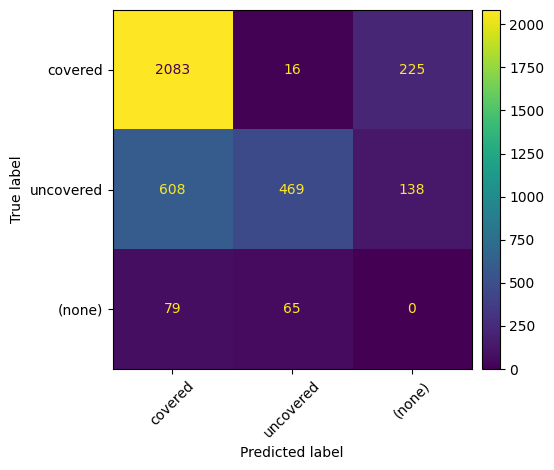

In [39]:
plot = results.plot_confusion_matrix(backend="matplotlib")
plot.show()

In [4]:
# Example usage
confusion_values = [
    [2083, 16, 225],  # covered
    [608, 459, 138],    # uncovered
    [79, 65, 0]      # (none)
]

results = calculate_combined_metrics(confusion_values)
print("Combined Confusion Matrix:\n", results["confusion_matrix"])
print(f"Precision: {results['precision']:.2f}")
print(f"Recall: {results['recall']:.2f}")
print(f"F1 Score: {results['f1_score']:.2f}")

Combined Confusion Matrix:
 [[   0  144]
 [ 363 3166]]
Precision: 0.96
Recall: 0.90
F1 Score: 0.93


### p201,206 conf 0.2

#### results

In [42]:
import fiftyone as fo

dataset = fo.load_dataset('yolo11_final_dataset_2cl_best_p201_p206_conf02')
# Get the 10 most common classes in the dataset
counts = dataset.count_values("full_GT_2cl.detections.label")
classes = sorted(counts, key=counts.get, reverse=True)[:3]

# Evaluate the objects in the `predictions` field with respect to the
# objects in the `ground_truth` field
results = dataset.evaluate_detections(
    pred_field="preds_yolo11x_conf02_iou015_best",
    gt_field="full_GT_2cl",
    eval_key="full_GT_vs_yolo11",
    method="coco",
    compute_mAP=True,
    iou=0.15,
    classwise=False
)

# Print a classification report for the top-10 classes
results.print_report(classes=classes)

# Print some statistics about the total TP/FP/FN counts
print("TP: %d" % dataset.sum("full_GT_vs_yolo11_tp"))
print("FP: %d" % dataset.sum("full_GT_vs_yolo11_fp"))
print("FN: %d" % dataset.sum("full_GT_vs_yolo11_fn"))

Evaluating detections...


10/24/2024 09:24:29 - INFO - fiftyone.utils.eval.detection -   Evaluating detections...


 100% |█████████████████| 644/644 [7.2s elapsed, 0s remaining, 90.7 samples/s]       


10/24/2024 09:24:36 - INFO - eta.core.utils -    100% |█████████████████| 644/644 [7.2s elapsed, 0s remaining, 90.7 samples/s]       


Performing IoU sweep...


10/24/2024 09:24:36 - INFO - fiftyone.utils.eval.coco -   Performing IoU sweep...


 100% |█████████████████| 644/644 [6.8s elapsed, 0s remaining, 95.8 samples/s]       


10/24/2024 09:24:43 - INFO - eta.core.utils -    100% |█████████████████| 644/644 [6.8s elapsed, 0s remaining, 95.8 samples/s]       


              precision    recall  f1-score   support

     covered       0.74      0.92      0.82      2324
   uncovered       0.81      0.40      0.53      1215

   micro avg       0.75      0.74      0.75      3539
   macro avg       0.78      0.66      0.68      3539
weighted avg       0.77      0.74      0.72      3539

TP: 2619
FP: 859
FN: 920


C:\Users\MikhailDarakhovich\AppData\Local\Temp\ipykernel_19796\88602896.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



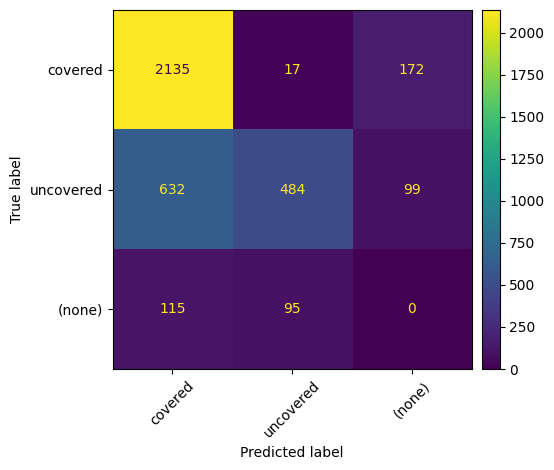

In [43]:
plot = results.plot_confusion_matrix(backend="matplotlib")
plot.show()

In [6]:
# Example usage
confusion_values = [
    [2135, 17, 172],  # covered
    [632, 484, 99],    # uncovered
    [115, 95, 0]      # (none)
]

results = calculate_combined_metrics(confusion_values)
print("Combined Confusion Matrix:\n", results["confusion_matrix"])
print(f"Precision: {results['precision']:.2f}")
print(f"Recall: {results['recall']:.2f}")
print(f"F1 Score: {results['f1_score']:.2f}")

Combined Confusion Matrix:
 [[   0  210]
 [ 271 3268]]
Precision: 0.94
Recall: 0.92
F1 Score: 0.93


## yolov11_final_dataset_2cl_23_best - p201_p206

### conf 0.15

#### results

In [4]:
import fiftyone as fo

dataset = fo.load_dataset('yolo11_final_dataset_2cl_best_p201_p206_conf_015')
# Get the 10 most common classes in the dataset
counts = dataset.count_values("full_GT_2cl.detections.label")
classes = sorted(counts, key=counts.get, reverse=True)[:3]

# Evaluate the objects in the `predictions` field with respect to the
# objects in the `ground_truth` field
results = dataset.evaluate_detections(
    pred_field="preds_yolo11x_conf015_iou015_best",
    gt_field="full_GT_2cl",
    eval_key="full_GT_vs_yolo11",
    method="coco",
    compute_mAP=True,
    iou=0.15,
    classwise=False
)

# Print a classification report for the top-10 classes
results.print_report(classes=classes)

# Print some statistics about the total TP/FP/FN counts
print("TP: %d" % dataset.sum("full_GT_vs_yolo11_tp"))
print("FP: %d" % dataset.sum("full_GT_vs_yolo11_fp"))
print("FN: %d" % dataset.sum("full_GT_vs_yolo11_fn"))


Evaluating detections...


10/23/2024 20:12:39 - INFO - fiftyone.utils.eval.detection -   Evaluating detections...


 100% |█████████████████| 644/644 [7.4s elapsed, 0s remaining, 87.4 samples/s]       


10/23/2024 20:12:46 - INFO - eta.core.utils -    100% |█████████████████| 644/644 [7.4s elapsed, 0s remaining, 87.4 samples/s]       


Performing IoU sweep...


10/23/2024 20:12:46 - INFO - fiftyone.utils.eval.coco -   Performing IoU sweep...


 100% |█████████████████| 644/644 [7.3s elapsed, 0s remaining, 93.2 samples/s]       


10/23/2024 20:12:54 - INFO - eta.core.utils -    100% |█████████████████| 644/644 [7.3s elapsed, 0s remaining, 93.2 samples/s]       


              precision    recall  f1-score   support

     covered       0.78      0.89      0.83      2324
   uncovered       0.67      0.63      0.65      1215

   micro avg       0.75      0.80      0.77      3539
   macro avg       0.72      0.76      0.74      3539
weighted avg       0.74      0.80      0.77      3539

TP: 2828
FP: 960
FN: 711


C:\Users\MikhailDarakhovich\AppData\Local\Temp\ipykernel_19796\88602896.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot.show()


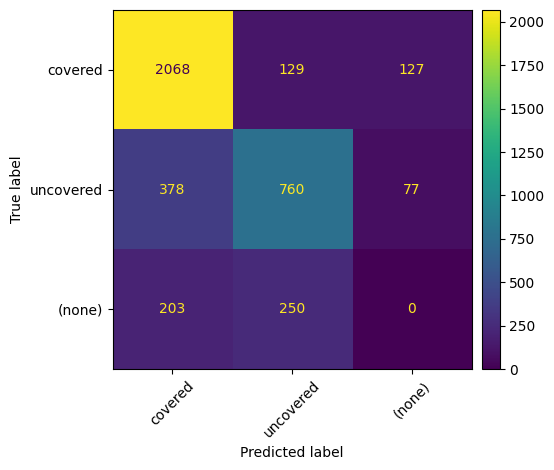

In [5]:
plot = results.plot_confusion_matrix(backend="matplotlib")
plot.show()

In [7]:
# Example usage
confusion_values = [
    [2068, 129, 127],  # covered
    [378, 760, 77],    # uncovered
    [203, 250, 0]      # (none)
]

results = calculate_combined_metrics(confusion_values)
print("Combined Confusion Matrix:\n", results["confusion_matrix"])
print(f"Precision: {results['precision']:.2f}")
print(f"Recall: {results['recall']:.2f}")
print(f"F1 Score: {results['f1_score']:.2f}")

Combined Confusion Matrix:
 [[   0  453]
 [ 204 3335]]
Precision: 0.88
Recall: 0.94
F1 Score: 0.91


### conf 0.285

#### results

In [46]:
import fiftyone as fo

dataset = fo.load_dataset('yolo11_final_dataset_2cl_best_p201_p206_conf_0285')
# Get the 10 most common classes in the dataset
counts = dataset.count_values("full_GT_2cl.detections.label")
classes = sorted(counts, key=counts.get, reverse=True)[:3]

# Evaluate the objects in the `predictions` field with respect to the
# objects in the `ground_truth` field
results = dataset.evaluate_detections(
    pred_field="preds_yolo11x_conf0285_iou015_best",
    gt_field="full_GT_2cl",
    eval_key="full_GT_vs_yolo11",
    method="coco",
    compute_mAP=True,
    iou=0.15,
    classwise=False
)

# Print a classification report for the top-10 classes
results.print_report(classes=classes)

# Print some statistics about the total TP/FP/FN counts
print("TP: %d" % dataset.sum("full_GT_vs_yolo11_tp"))
print("FP: %d" % dataset.sum("full_GT_vs_yolo11_fp"))
print("FN: %d" % dataset.sum("full_GT_vs_yolo11_fn"))

Evaluating detections...


10/24/2024 09:39:18 - INFO - fiftyone.utils.eval.detection -   Evaluating detections...


 100% |█████████████████| 644/644 [7.4s elapsed, 0s remaining, 100.8 samples/s]      


10/24/2024 09:39:25 - INFO - eta.core.utils -    100% |█████████████████| 644/644 [7.4s elapsed, 0s remaining, 100.8 samples/s]      


Performing IoU sweep...


10/24/2024 09:39:25 - INFO - fiftyone.utils.eval.coco -   Performing IoU sweep...


 100% |█████████████████| 644/644 [6.0s elapsed, 0s remaining, 102.6 samples/s]      


10/24/2024 09:39:31 - INFO - eta.core.utils -    100% |█████████████████| 644/644 [6.0s elapsed, 0s remaining, 102.6 samples/s]      


              precision    recall  f1-score   support

     covered       0.82      0.83      0.82      2324
   uncovered       0.76      0.59      0.67      1215

   micro avg       0.80      0.75      0.77      3539
   macro avg       0.79      0.71      0.75      3539
weighted avg       0.80      0.75      0.77      3539

TP: 2650
FP: 650
FN: 889


C:\Users\MikhailDarakhovich\AppData\Local\Temp\ipykernel_19796\88602896.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



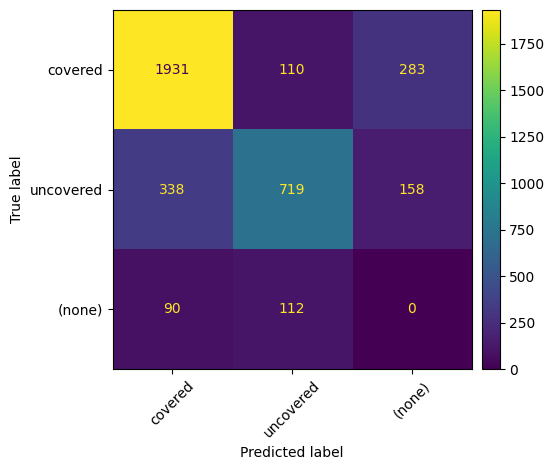

In [47]:
plot = results.plot_confusion_matrix(backend="matplotlib")
plot.show()

In [8]:
# Example usage
confusion_values = [
    [1931, 110, 283],  # covered
    [338, 719, 158],    # uncovered
    [90, 112, 0]      # (none)
]

results = calculate_combined_metrics(confusion_values)
print("Combined Confusion Matrix:\n", results["confusion_matrix"])
print(f"Precision: {results['precision']:.2f}")
print(f"Recall: {results['recall']:.2f}")
print(f"F1 Score: {results['f1_score']:.2f}")

Combined Confusion Matrix:
 [[   0  202]
 [ 441 3098]]
Precision: 0.94
Recall: 0.88
F1 Score: 0.91


### conf 0.25

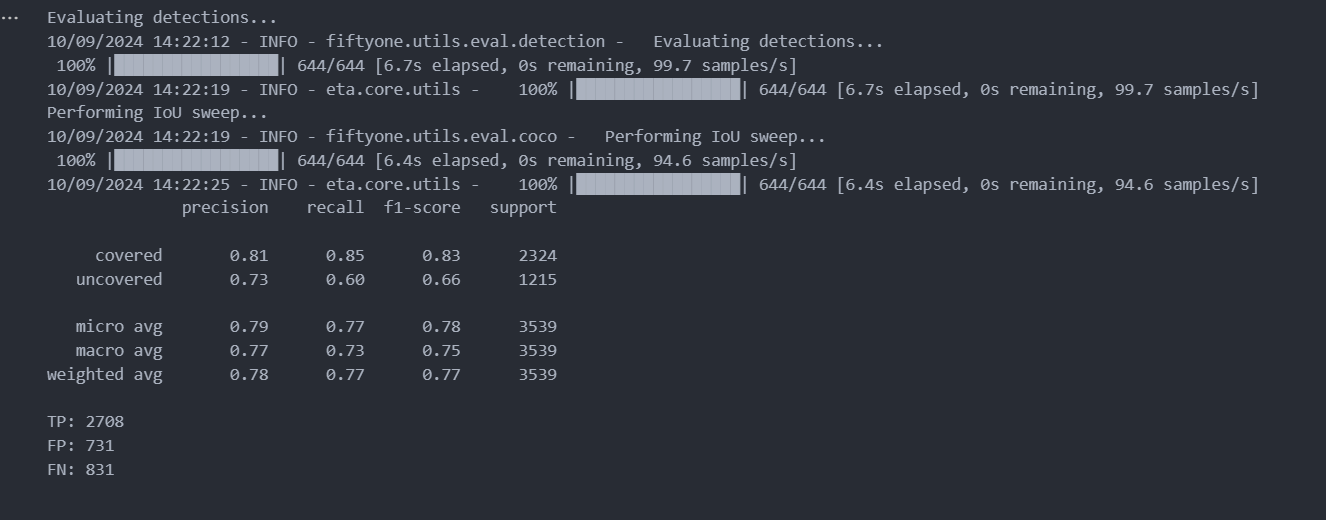

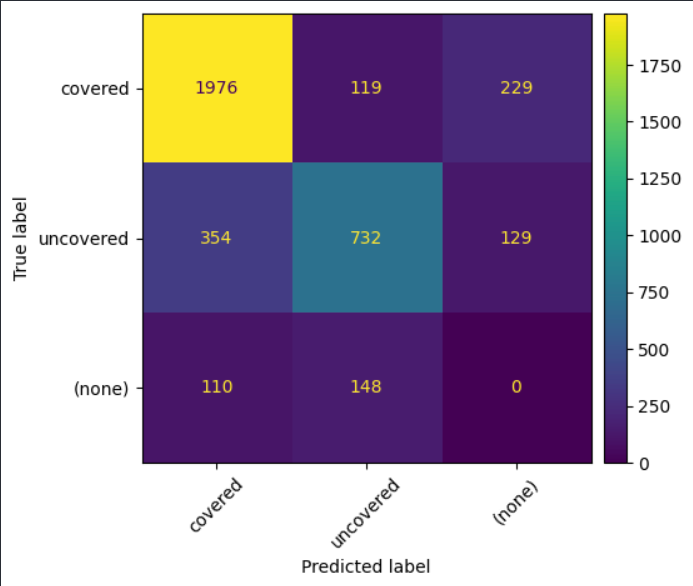

In [13]:
# Example usage
confusion_values = [
    [1976, 119, 229],  # covered
    [354, 732, 129],    # uncovered
    [110, 148, 0]      # (none)
]

results = calculate_combined_metrics(confusion_values)
print("Combined Confusion Matrix:\n", results["confusion_matrix"])
print(f"Precision: {results['precision']:.2f}")
print(f"Recall: {results['recall']:.2f}")
print(f"F1 Score: {results['f1_score']:.2f}")

Combined Confusion Matrix:
 [[   0  258]
 [ 358 3181]]
Precision: 0.92
Recall: 0.90
F1 Score: 0.91


### conf 0.35

#### results

In [9]:
import fiftyone as fo

dataset = fo.load_dataset('yolo11_final_dataset_2cl_best_p201_p206_conf_035')
# Get the 10 most common classes in the dataset
counts = dataset.count_values("full_GT_2cl.detections.label")
classes = sorted(counts, key=counts.get, reverse=True)[:3]

# Evaluate the objects in the `predictions` field with respect to the
# objects in the `ground_truth` field
results = dataset.evaluate_detections(
    pred_field="preds_yolo11x_conf035_iou015_best",
    gt_field="full_GT_2cl",
    eval_key="full_GT_vs_yolo11",
    method="coco",
    compute_mAP=True,
    iou=0.15,
    classwise=False
)

# Print a classification report for the top-10 classes
results.print_report(classes=classes)

# Print some statistics about the total TP/FP/FN counts
print("TP: %d" % dataset.sum("full_GT_vs_yolo11_tp"))
print("FP: %d" % dataset.sum("full_GT_vs_yolo11_fp"))
print("FN: %d" % dataset.sum("full_GT_vs_yolo11_fn"))


Evaluating detections...


10/23/2024 20:18:50 - INFO - fiftyone.utils.eval.detection -   Evaluating detections...


 100% |█████████████████| 644/644 [6.4s elapsed, 0s remaining, 103.1 samples/s]      


10/23/2024 20:18:56 - INFO - eta.core.utils -    100% |█████████████████| 644/644 [6.4s elapsed, 0s remaining, 103.1 samples/s]      


Performing IoU sweep...


10/23/2024 20:18:56 - INFO - fiftyone.utils.eval.coco -   Performing IoU sweep...


 100% |█████████████████| 644/644 [6.3s elapsed, 0s remaining, 101.7 samples/s]      


10/23/2024 20:19:02 - INFO - eta.core.utils -    100% |█████████████████| 644/644 [6.3s elapsed, 0s remaining, 101.7 samples/s]      


              precision    recall  f1-score   support

     covered       0.84      0.78      0.81      2324
   uncovered       0.83      0.55      0.66      1215

   micro avg       0.84      0.70      0.76      3539
   macro avg       0.83      0.67      0.74      3539
weighted avg       0.84      0.70      0.76      3539

TP: 2480
FP: 485
FN: 1059


C:\Users\MikhailDarakhovich\AppData\Local\Temp\ipykernel_19796\88602896.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



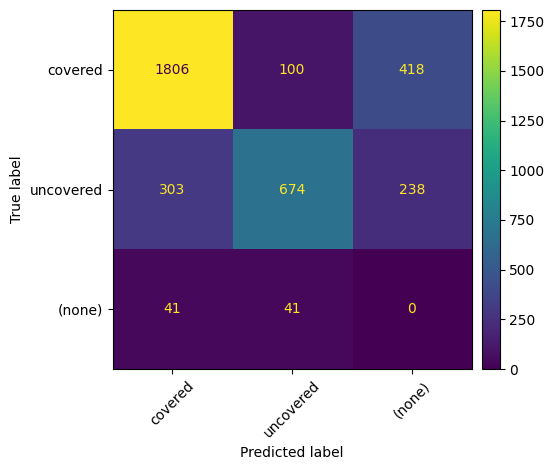

In [10]:
plot = results.plot_confusion_matrix(backend="matplotlib")
plot.show()

In [9]:
# Example usage
confusion_values = [
    [1806, 100, 418],  # covered
    [303, 674, 238],    # uncovered
    [41, 41, 0]      # (none)
]

results = calculate_combined_metrics(confusion_values)
print("Combined Confusion Matrix:\n", results["confusion_matrix"])
print(f"Precision: {results['precision']:.2f}")
print(f"Recall: {results['recall']:.2f}")
print(f"F1 Score: {results['f1_score']:.2f}")

Combined Confusion Matrix:
 [[   0   82]
 [ 656 2883]]
Precision: 0.97
Recall: 0.81
F1 Score: 0.89


### conf 0.25 conf 0.25 iou 0.7

#### results

In [14]:
import fiftyone as fo

dataset = fo.load_dataset('yolo11_final_dataset_2cl_best_p201_p206_conf025_iou07')
# Get the 10 most common classes in the dataset
counts = dataset.count_values("full_GT_2cl.detections.label")
classes = sorted(counts, key=counts.get, reverse=True)[:3]

# Evaluate the objects in the `predictions` field with respect to the
# objects in the `ground_truth` field
results = dataset.evaluate_detections(
    pred_field="preds_yolo11x_conf025_iou07_best",
    gt_field="full_GT_2cl",
    eval_key="full_GT_vs_yolo11",
    method="coco",
    compute_mAP=True,
    iou=0.15,
    classwise=False
)

# Print a classification report for the top-10 classes
results.print_report(classes=classes)

# Print some statistics about the total TP/FP/FN counts
print("TP: %d" % dataset.sum("full_GT_vs_yolo11_tp"))
print("FP: %d" % dataset.sum("full_GT_vs_yolo11_fp"))
print("FN: %d" % dataset.sum("full_GT_vs_yolo11_fn"))

Evaluating detections...


10/23/2024 20:36:52 - INFO - fiftyone.utils.eval.detection -   Evaluating detections...


 100% |█████████████████| 644/644 [7.5s elapsed, 0s remaining, 89.0 samples/s]       


10/23/2024 20:36:59 - INFO - eta.core.utils -    100% |█████████████████| 644/644 [7.5s elapsed, 0s remaining, 89.0 samples/s]       


Performing IoU sweep...


10/23/2024 20:36:59 - INFO - fiftyone.utils.eval.coco -   Performing IoU sweep...


 100% |█████████████████| 644/644 [6.9s elapsed, 0s remaining, 96.1 samples/s]       


10/23/2024 20:37:06 - INFO - eta.core.utils -    100% |█████████████████| 644/644 [6.9s elapsed, 0s remaining, 96.1 samples/s]       


              precision    recall  f1-score   support

     covered       0.78      0.85      0.82      2324
   uncovered       0.71      0.61      0.66      1215

   micro avg       0.76      0.77      0.77      3539
   macro avg       0.75      0.73      0.74      3539
weighted avg       0.76      0.77      0.76      3539

TP: 2718
FP: 838
FN: 821


C:\Users\MikhailDarakhovich\AppData\Local\Temp\ipykernel_19796\88602896.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



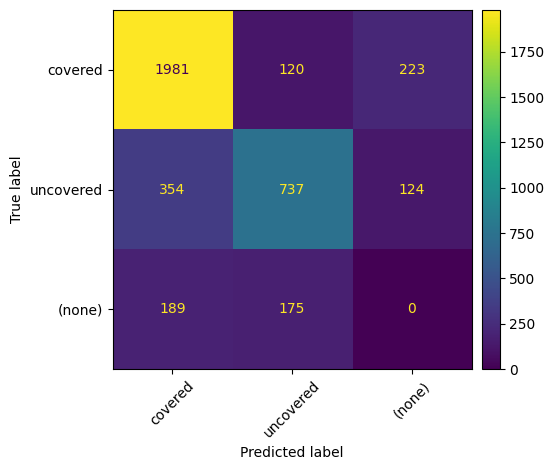

In [15]:
plot = results.plot_confusion_matrix(backend="matplotlib")
plot.show()

In [10]:
# Example usage
confusion_values = [
    [1981, 120, 223],  # covered
    [354, 737, 124],    # uncovered
    [189, 175, 0]      # (none)
]

results = calculate_combined_metrics(confusion_values)
print("Combined Confusion Matrix:\n", results["confusion_matrix"])
print(f"Precision: {results['precision']:.2f}")
print(f"Recall: {results['recall']:.2f}")
print(f"F1 Score: {results['f1_score']:.2f}")

Combined Confusion Matrix:
 [[   0  364]
 [ 347 3192]]
Precision: 0.90
Recall: 0.90
F1 Score: 0.90


### conf 0.35 aug

#### results

In [30]:
import fiftyone as fo

dataset = fo.load_dataset('yolo11_final_dataset_2cl_best_p201_p206_conf035_aug')
# Get the 10 most common classes in the dataset
counts = dataset.count_values("full_GT_2cl.detections.label")
classes = sorted(counts, key=counts.get, reverse=True)[:3]

# Evaluate the objects in the `predictions` field with respect to the
# objects in the `ground_truth` field
results = dataset.evaluate_detections(
    pred_field="preds_yolo11x_conf025_iou015_best",
    gt_field="full_GT_2cl",
    eval_key="full_GT_vs_yolo11",
    method="coco",
    compute_mAP=True,
    iou=0.15,
    classwise=False
)

# Print a classification report for the top-10 classes
results.print_report(classes=classes)

# Print some statistics about the total TP/FP/FN counts
print("TP: %d" % dataset.sum("full_GT_vs_yolo11_tp"))
print("FP: %d" % dataset.sum("full_GT_vs_yolo11_fp"))
print("FN: %d" % dataset.sum("full_GT_vs_yolo11_fn"))

Evaluating detections...


10/23/2024 21:08:59 - INFO - fiftyone.utils.eval.detection -   Evaluating detections...


 100% |█████████████████| 644/644 [7.8s elapsed, 0s remaining, 94.9 samples/s]       


10/23/2024 21:09:07 - INFO - eta.core.utils -    100% |█████████████████| 644/644 [7.8s elapsed, 0s remaining, 94.9 samples/s]       


Performing IoU sweep...


10/23/2024 21:09:07 - INFO - fiftyone.utils.eval.coco -   Performing IoU sweep...


 100% |█████████████████| 644/644 [6.8s elapsed, 0s remaining, 97.0 samples/s]       


10/23/2024 21:09:13 - INFO - eta.core.utils -    100% |█████████████████| 644/644 [6.8s elapsed, 0s remaining, 97.0 samples/s]       


              precision    recall  f1-score   support

     covered       0.80      0.81      0.80      2324
   uncovered       0.65      0.74      0.69      1215

   micro avg       0.74      0.79      0.76      3539
   macro avg       0.72      0.78      0.75      3539
weighted avg       0.75      0.79      0.77      3539

TP: 2786
FP: 961
FN: 753


C:\Users\MikhailDarakhovich\AppData\Local\Temp\ipykernel_19796\88602896.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



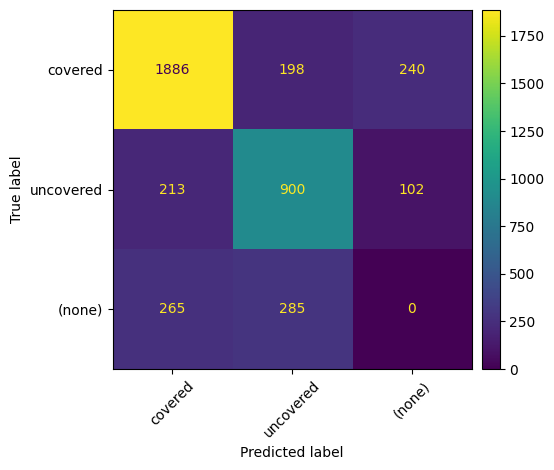

In [31]:
plot = results.plot_confusion_matrix(backend="matplotlib")
plot.show()

In [11]:
# Example usage
confusion_values = [
    [1886, 198, 240],  # covered
    [213, 900, 102],    # uncovered
    [265, 285, 0]      # (none)
]

results = calculate_combined_metrics(confusion_values)
print("Combined Confusion Matrix:\n", results["confusion_matrix"])
print(f"Precision: {results['precision']:.2f}")
print(f"Recall: {results['recall']:.2f}")
print(f"F1 Score: {results['f1_score']:.2f}")

Combined Confusion Matrix:
 [[   0  550]
 [ 342 3197]]
Precision: 0.85
Recall: 0.90
F1 Score: 0.88


### conf 0.35 sahi

#### results

In [26]:
import fiftyone as fo

dataset = fo.load_dataset('yolo11_final_dataset_2cl_best_p201_p206_conf035_sahi')
# Get the 10 most common classes in the dataset
counts = dataset.count_values("full_GT_2cl.detections.label")
classes = sorted(counts, key=counts.get, reverse=True)[:3]

# Evaluate the objects in the `predictions` field with respect to the
# objects in the `ground_truth` field
results = dataset.evaluate_detections(
    pred_field="preds_yolo11x_conf025_iou015_best",
    gt_field="full_GT_2cl",
    eval_key="full_GT_vs_yolo11",
    method="coco",
    compute_mAP=True,
    iou=0.15,
    classwise=False
)

# Print a classification report for the top-10 classes
results.print_report(classes=classes)

# Print some statistics about the total TP/FP/FN counts
print("TP: %d" % dataset.sum("full_GT_vs_yolo11_tp"))
print("FP: %d" % dataset.sum("full_GT_vs_yolo11_fp"))
print("FN: %d" % dataset.sum("full_GT_vs_yolo11_fn"))

Evaluating detections...


10/23/2024 21:02:02 - INFO - fiftyone.utils.eval.detection -   Evaluating detections...


 100% |█████████████████| 644/644 [8.1s elapsed, 0s remaining, 90.6 samples/s]       


10/23/2024 21:02:10 - INFO - eta.core.utils -    100% |█████████████████| 644/644 [8.1s elapsed, 0s remaining, 90.6 samples/s]       


Performing IoU sweep...


10/23/2024 21:02:10 - INFO - fiftyone.utils.eval.coco -   Performing IoU sweep...


 100% |█████████████████| 644/644 [6.4s elapsed, 0s remaining, 100.7 samples/s]      


10/23/2024 21:02:17 - INFO - eta.core.utils -    100% |█████████████████| 644/644 [6.4s elapsed, 0s remaining, 100.7 samples/s]      


              precision    recall  f1-score   support

     covered       0.81      0.79      0.80      2324
   uncovered       0.66      0.67      0.66      1215

   micro avg       0.76      0.75      0.75      3539
   macro avg       0.74      0.73      0.73      3539
weighted avg       0.76      0.75      0.75      3539

TP: 2648
FP: 851
FN: 891


C:\Users\MikhailDarakhovich\AppData\Local\Temp\ipykernel_19796\88602896.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



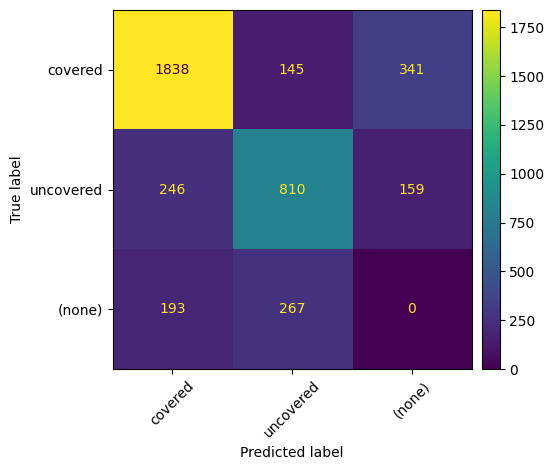

In [27]:
plot = results.plot_confusion_matrix(backend="matplotlib")
plot.show()

In [12]:
# Example usage
confusion_values = [
    [1838, 145, 341],  # covered
    [246, 810, 159],    # uncovered
    [193, 267, 0]      # (none)
]

results = calculate_combined_metrics(confusion_values)
print("Combined Confusion Matrix:\n", results["confusion_matrix"])
print(f"Precision: {results['precision']:.2f}")
print(f"Recall: {results['recall']:.2f}")
print(f"F1 Score: {results['f1_score']:.2f}")

Combined Confusion Matrix:
 [[   0  460]
 [ 500 3039]]
Precision: 0.87
Recall: 0.86
F1 Score: 0.86


# GT

## Ela vs GT

In [32]:
import fiftyone as fo

dataset = fo.load_dataset('yolo11_final_dataset_2cl_best_p201_p206_conf_0285')
# Get the 10 most common classes in the dataset
counts = dataset.count_values("ela_GT_2cl.detections.label")
classes = sorted(counts, key=counts.get, reverse=True)[:3]

# Evaluate the objects in the `predictions` field with respect to the
# objects in the `ground_truth` field
results = dataset.evaluate_detections(
    pred_field="ela_GT_2cl",
    gt_field="full_GT_2cl",
    eval_key="full_GT_vs_ela",
    method="coco",
    compute_mAP=False,
    iou=0.15,
    classwise=False
)

# Print a classification report for the top-10 classes
results.print_report(classes=classes)

# Print some statistics about the total TP/FP/FN counts
print("TP: %d" % dataset.sum("full_GT_vs_ela_tp"))
print("FP: %d" % dataset.sum("full_GT_vs_ela_fp"))
print("FN: %d" % dataset.sum("full_GT_vs_ela_fn"))

Evaluating detections...
 100% |█████████████████| 644/644 [8.1s elapsed, 0s remaining, 91.8 samples/s]       
              precision    recall  f1-score   support

     covered       0.95      0.83      0.88      2324
   uncovered       0.77      0.91      0.84      1215

   micro avg       0.88      0.86      0.87      3539
   macro avg       0.86      0.87      0.86      3539
weighted avg       0.89      0.86      0.87      3539

TP: 3032
FP: 428
FN: 507


C:\Users\MikhailDarakhovich\AppData\Local\Temp\ipykernel_4580\88602896.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot.show()


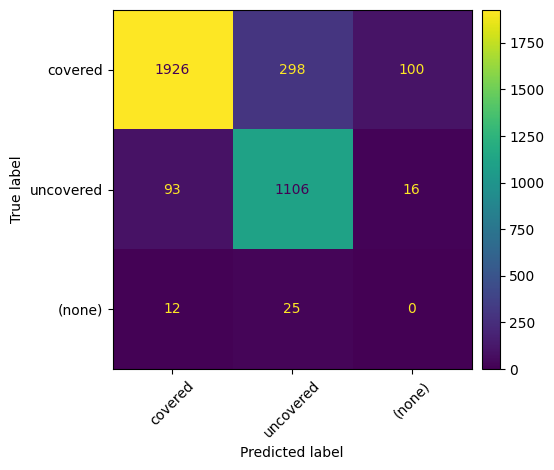

In [33]:
plot = results.plot_confusion_matrix(backend="matplotlib")
plot.show()

In [49]:
# Example usage
confusion_values = [
    [1926, 298, 100],  # covered
    [93, 1106, 16],    # uncovered
    [12, 25, 0]      # (none)
]

results = calculate_combined_metrics(confusion_values)
print("Combined Confusion Matrix:\n", results["confusion_matrix"])
print(f"Precision: {results['precision']:.2f}")
print(f"Recall: {results['recall']:.2f}")
print(f"F1 Score: {results['f1_score']:.2f}")

Combined Confusion Matrix:
 [[   0   37]
 [ 116 3423]]
Precision: 0.99
Recall: 0.97
F1 Score: 0.98


## Asia vs GT

In [40]:
import fiftyone as fo

dataset = fo.load_dataset('yolo11_final_dataset_2cl_best_p201_p206_conf_0285')
# Get the 10 most common classes in the dataset
counts = dataset.count_values("asia_GT_2cl.detections.label")
classes = sorted(counts, key=counts.get, reverse=True)[:3]

# Evaluate the objects in the `predictions` field with respect to the
# objects in the `ground_truth` field
results = dataset.evaluate_detections(
    pred_field="asia_GT_2cl1",
    gt_field="full_GT_2cl",
    eval_key="full_GT_vs_asia1",
    method="coco",
    compute_mAP=False,
    iou=0.15,
    classwise=False
)

# Print a classification report for the top-10 classes
results.print_report(classes=classes)

# Print some statistics about the total TP/FP/FN counts
print("TP: %d" % dataset.sum("full_GT_vs_asia1_tp"))
print("FP: %d" % dataset.sum("full_GT_vs_asia1_fp"))
print("FN: %d" % dataset.sum("full_GT_vs_asia1_fn"))

Evaluating detections...
 100% |█████████████████| 644/644 [9.1s elapsed, 0s remaining, 80.7 samples/s]       
              precision    recall  f1-score   support

     covered       0.80      0.98      0.88      2324
   uncovered       0.98      0.51      0.67      1215

   micro avg       0.83      0.82      0.83      3539
   macro avg       0.89      0.75      0.78      3539
weighted avg       0.86      0.82      0.81      3539

TP: 2909
FP: 578
FN: 630


C:\Users\MikhailDarakhovich\AppData\Local\Temp\ipykernel_4580\88602896.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot.show()


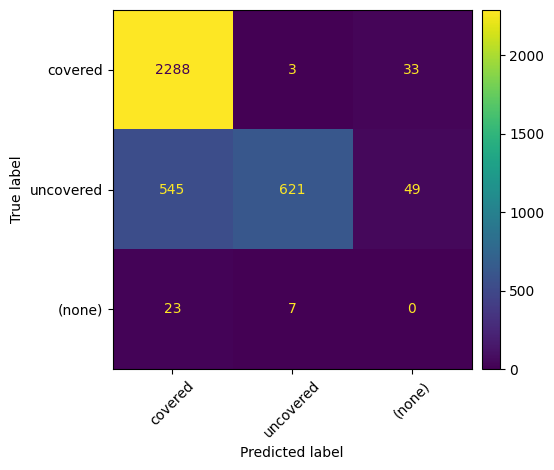

In [41]:
plot = results.plot_confusion_matrix(backend="matplotlib")
plot.show()

In [48]:
# Example usage
confusion_values = [
    [2288, 3, 33],  # covered
    [545, 621, 49],    # uncovered
    [23, 7, 0]      # (none)
]

results = calculate_combined_metrics(confusion_values)
print("Combined Confusion Matrix:\n", results["confusion_matrix"])
print(f"Precision: {results['precision']:.2f}")
print(f"Recall: {results['recall']:.2f}")
print(f"F1 Score: {results['f1_score']:.2f}")

Combined Confusion Matrix:
 [[   0   30]
 [  82 3457]]
Precision: 0.99
Recall: 0.98
F1 Score: 0.98


## Asia vs Ela

In [42]:
import fiftyone as fo

dataset = fo.load_dataset('yolo11_final_dataset_2cl_best_p201_p206_conf_0285')
# Get the 10 most common classes in the dataset
counts = dataset.count_values("asia_GT_2cl.detections.label")
classes = sorted(counts, key=counts.get, reverse=True)[:3]

# Evaluate the objects in the `predictions` field with respect to the
# objects in the `ground_truth` field
results = dataset.evaluate_detections(
    pred_field="asia_GT_2cl1",
    gt_field="ela_GT_2cl",
    eval_key="ela_vs_asia",
    method="coco",
    compute_mAP=False,
    iou=0.15,
    classwise=False
)

# Print a classification report for the top-10 classes
results.print_report(classes=classes)

# Print some statistics about the total TP/FP/FN counts
print("TP: %d" % dataset.sum("ela_vs_asia_tp"))
print("FP: %d" % dataset.sum("ela_vs_asia_fp"))
print("FN: %d" % dataset.sum("ela_vs_asia_fn"))

Evaluating detections...
                                                                                      100% |█████████████████| 644/644 [9.5s elapsed, 0s remaining, 75.0 samples/s]       
              precision    recall  f1-score   support

     covered       0.68      0.96      0.80      2031
   uncovered       0.93      0.41      0.57      1429

   micro avg       0.73      0.73      0.73      3460
   macro avg       0.81      0.69      0.68      3460
weighted avg       0.78      0.73      0.70      3460

TP: 2540
FP: 947
FN: 920


C:\Users\MikhailDarakhovich\AppData\Local\Temp\ipykernel_4580\88602896.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot.show()


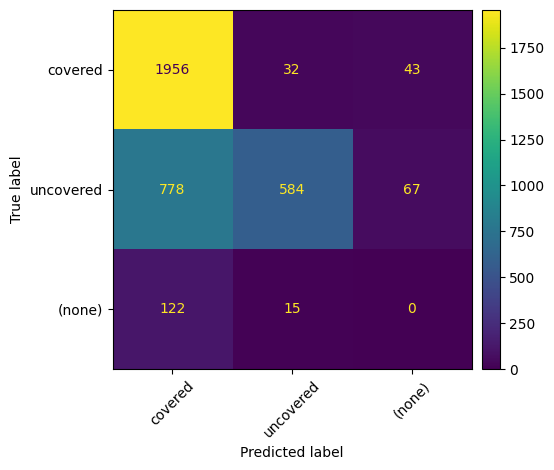

In [43]:
plot = results.plot_confusion_matrix(backend="matplotlib")
plot.show()

In [47]:
# Example usage
confusion_values = [
    [1956, 32, 43],  # covered
    [778, 584, 67],    # uncovered
    [122, 15, 0]      # (none)
]

results = calculate_combined_metrics(confusion_values)
print("Combined Confusion Matrix:\n", results["confusion_matrix"])
print(f"Precision: {results['precision']:.2f}")
print(f"Recall: {results['recall']:.2f}")
print(f"F1 Score: {results['f1_score']:.2f}")

Combined Confusion Matrix:
 [[   0  137]
 [ 110 3350]]
Precision: 0.96
Recall: 0.97
F1 Score: 0.96
